In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# prebuild model with pre-trained weights on imagenet
base_model = VGG16(weights='imagenet', include_top=True)
print (base_model)

for i, layer in enumerate(base_model.layers):
	print (i, layer.name, layer.output_shape)

# extract features from block4_pool block
model = models.Model(inputs=base_model.input,
	outputs=base_model.get_layer('block4_pool').output)

##img = image.load_img(img_path, target_size=(224, 224))
##x = image.img_to_array(img)
##x = np.expand_dims(x, axis=0)

# preprocessing for images
##x = preprocess_input(x)

# get the features from this block
##features = model.predict(x)
##print(features.shape)
##print(features)

553467096/553467096 [==============================] - 11s 0us/step
0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

print(train_images.shape)
print(train_labels.shape)

169001437/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [4]:
from PIL import Image

p_train_images=np.zeros((20,224,224,3))
p_test_images=np.zeros((10,224,224,3))

for i in range(0,20):
  ar = train_images[i]
  img = tf.keras.preprocessing.image.array_to_img(ar)
  img = img.resize((224,224))
  p_train_images[i] = tf.keras.preprocessing.image.img_to_array(img)

for i in range(0,10):
  ar = test_images[i]
  img = tf.keras.preprocessing.image.array_to_img(ar)
  img = img.resize((224,224))
  p_test_images[i] = tf.keras.preprocessing.image.img_to_array(img)

print(p_train_images.shape)
print(p_test_images.shape)

(20, 224, 224, 3)
(10, 224, 224, 3)


AxesImage(size=(224, 224))


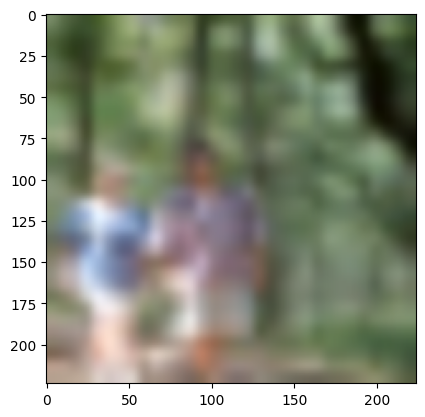

In [5]:
import matplotlib.pyplot as plt

print(plt.imshow(tf.keras.preprocessing.image.array_to_img(p_test_images[1])))

In [6]:
p_train_features = model.predict(p_train_images)
p_test_features = model.predict(p_test_images)

1/1 [==============================] - 10s 10s/step


In [7]:
print(p_train_features.shape)
print(p_test_features.shape)

(20, 14, 14, 512)
(10, 14, 14, 512)


In [8]:
p_train_features_flat = np.reshape(p_train_features, (20, 14 * 14 * 512))
p_test_features_flat = np.reshape(p_test_features, (10, 14 * 14 * 512))
print(p_train_features_flat.shape)
print(p_test_features_flat.shape)

(20, 100352)
(10, 100352)


In [9]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 14 * 14 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['acc'])

t_l = tf.keras.utils.to_categorical(train_labels[:20],100)
print(t_l.shape)

history = model.fit(p_train_features_flat, t_l,
                    epochs=10,
                    batch_size=5, validation_split=0.2)

model.evaluate(p_test_features_flat, tf.keras.utils.to_categorical(test_labels[:10],100))

(20, 100)
Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: 6952.3354 - acc: 0.0000e+00 - val_loss: 6237.2617 - val_acc: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 4s 924ms/step - loss: 5954.5781 - acc: 0.1250 - val_loss: 7097.8892 - val_acc: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 3s 662ms/step - loss: 1769.1750 - acc: 0.4375 - val_loss: 5183.5669 - val_acc: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 2s 435ms/step - loss: 1125.8220 - acc: 0.7500 - val_loss: 3934.5325 - val_acc: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 2s 420ms/step - loss: 707.4370 - acc: 0.5625 - val_loss: 6007.5830 - val_acc: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 2s 463ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 6007.5830 - val_acc: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 2s 458ms/step - loss: 1281.4196 - acc: 0.7500 - val_loss: 6313.6270 - val_acc: 0.0000e+00
Epoch 8/1

[4696.94140625, 0.0]